Test

In [13]:
from tensorflow.examples.tutorials.mnist import input_data
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.models import Model
from keras.optimizers import Adam


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
import tensorflow as tf

from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1791 - val_loss: 0.1743
Epoch 2/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1732 - val_loss: 0.1690
Epoch 3/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1682 - val_loss: 0.1643
Epoch 4/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.1637 - val_loss: 0.1600
Epoch 5/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1597 - val_loss: 0.1562
Epoch 6/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1560 - val_loss: 0.1527
Epoch 7/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.1526 - val_loss: 0.1493
Epoch 8/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.1494 - val_loss: 0.1465
Epoch 9/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.146

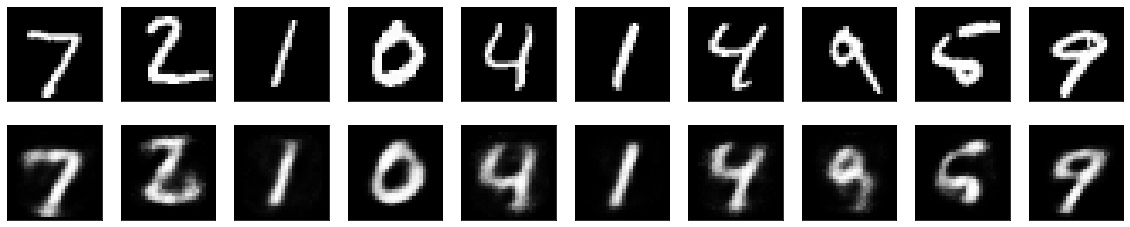

In [12]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
                
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
